## Tic-Tac-Toe Agent
​
In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

#### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
# from <TC_Env> import <TicTacToe> - import your class from environment file
from TCGame_Env1 import TicTacToe
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt
%matplotlib notebook

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):
    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
## tracking
# {('X-X-X-X-X-X-X-X-X',(7,5)):[0,0.25,0.255....]
# ('X-1-X-X-X-X-6-X-X',(7,3))}

## Q-table
# {'X-X-X-X-X-X-X-X-X':{(7,5):0,(7,3):0}}

In [4]:
###### -------please call your environment as env
env = TicTacToe()

In [5]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    valid_Actions = [i for i in env.action_space(state)[0]] 
    return valid_Actions


In [6]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    if state1 not in Q_dict.keys():
        valid_act = valid_actions(state)
        for action in valid_act:
            Q_dict[state1][action]= 0

In [7]:
# Q_dict = {'X-X-X-X-X-X-X-X-X': {(7,5):0.0 ,(6,1):0.0 ,. . .}}

#### Epsilon-greedy strategy - Write your code here

(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [8]:
def epsilon_greedy(state, time):
    
    
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*time)
    
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        agent_actions, env_actions = env.action_space(state)
        action = random.choice(list(agent_actions))    #Exploration: randomly choosing and action
    
    return action

#### Tracking the state-action pairs for checking convergence - write your code here

In [9]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)

States_track = collections.defaultdict(dict)

rewards_tracked = {(2,1):0,(4,4):0, (7,3): 0, (8,3):0, (9,7):0}


print(len(Q_dict))
print(len(rewards_tracked))
print(len(States_track))

0
5
0


In [10]:
# Initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [('x-3-x-x-x-6-x-x-x',(0,1)),
                       ('x-1-x-x-x-x-8-x-x',(2,9)),
                       ('x-x-x-x-x-x-x-x-x',(6,5)),
                       ('x-x-x-x-6-x-x-x-5',(2,7)),
                       ('x-x-x-x-9-x-6-x-x',(1,7)),
                       ('x-x-x-x-x-x-x-x-x',(1,9)),
                       ('x-5-x-2-x-x-4-7-x',(0,9)),
                       ('9-x-5-x-x-x-8-x-4',(1,3)),
                       ('2-7-x-x-6-x-x-3-x',(8,5)),
                       ('9-x-x-x-x-2-x-x-x',(2,5)),
                       ('x-x-7-x-x-x-x-x-2',(1,5)),
                       ('5-x-x-x-x-6-x-x-x',(4,9)),
                       ('x-3-x-x-1-x-x-x-x',(7,5)),
                       ('4-x-x-6-x-x-3-1-x',(8,5)),
                       ('5-x-8-x-x-6-3-x-x',(3,1)),
                       ('x-6-5-x-2-x-x-3-x',(0,7)),
                       ('x-5-x-x-x-x-5-7-x',(8,2)),
                       ('7-x-5-x-2-x-x-x-6',(1,3))]  
    
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        state1 = Q_state(state)
        States_track[state1][action] = []    

In [11]:
initialise_tracking_states()

In [12]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [13]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [14]:
States_track['X-X-X-X-X-X-X-X-X'][(7,5)] =[0.0,0.2,0.4,0.6]
States_track['X-X-X-X-X-X-X-X-X'][(7,5)].append(0.44)
States_track['X-X-X-X-X-X-X-X-X'][(7,5)] == [0.0,0.2,0.4,0.6,0.44]

True

In [15]:
initialise_tracking_states()

#### Define hyperparameters  ---write your code here

In [16]:
#define HP

EPISODES = 15000000
# EPISODES = 20000

LR = 0.01   # learning rate
GAMMA = 0.91

max_epsilon = 1.0
min_epsilon = 0.001

threshold = 2000      
policy_threshold = 30000


In [17]:
# Q-Dictionary has states like this.
# (a) which one should we use for plotting?

# '9-2-x-5-1-7-8-4-6': {(2, 3): 0.0},
# 'x-8-x-x-x-9-x-x-x': {(0, 1): -0.3,
# (0, 3): -0.4112659743,

In [18]:
# {
#     ('9-2-x-5-1-7-8-4-6',(2, 3)) : [0.0,0.1,0.2,0.3],
#     ('9-2-x-5-X-7-X-4-6',(2, 3)) : [0.0,0.1,0.2,0.3],
#     ('X-X-X-X-X-X-X-X-X',(7,5)) :
#     ('X-1-X-X-X-X-6-X-X',(7,3)) : 
# }

### Q-update loop ---write your code here

In [19]:
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe()      #creating an instance of the class
    #this initialises the state back to some initial value which is required for every new episode
    #this also initialises all parameters like m,p,K, etc.
    
    curr_state = env.state     #note that we are starting on this day's evening because action is taken in the evening
    #curr_state is state_mon
    isTerminated = False
    add_to_dict(curr_state)
    
    total_reward = 0
    
    while not isTerminated:    #the episode will run only for a few steps and not infinitely
        
        current_state_ele = Q_state(curr_state)
        #curr_action is a_tue and is a(t-1)      
        curr_action = epsilon_greedy(curr_state, episode)
        next_state, reward,isTerminated = env.step(curr_state, curr_action)
        #next_state is state_wed 
        next_state_ele = Q_state(next_state)
        
        add_to_dict(next_state)
        
        if isTerminated:
            Q_dict[current_state_ele][curr_action] += LR * ((reward - Q_dict[current_state_ele][curr_action]))
        else:
            # UPDATE RULE
            max_next = max(Q_dict[next_state_ele],key=Q_dict[next_state_ele].get)   #this gets the action corresponding to max q-value of next state
            Q_dict[current_state_ele][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_ele][max_next]))) - Q_dict[current_state_ele][curr_action] ) 

        curr_state = next_state       
        total_reward += reward
    
    
    
    if ((episode+1) % threshold) == 0:   #every 2000th episode
        save_tracking_states()
        save_obj(States_track,'States_tracked')   
    
    #SAVING POLICY
    if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy')    
        
        
elapsed_time = time.time() - start_time  
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')      
print('Total Execution time: ', elapsed_time)



Total Execution time:  14401.610347986221


#### Check the Q-dictionary

In [20]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): 3.8994384135140416,
              (0, 3): 2.8735979557448497,
              (0, 5): 3.412435947002718,
              (0, 7): 0.9183998573995421,
              (0, 9): -0.28947185399513026,
              (1, 1): 4.360857422239469,
              (1, 3): 4.629346400243381,
              (1, 5): 3.4400673854666004,
              (1, 7): -0.08153634890423171,
              (1, 9): -0.03824100098442184,
              (2, 1): 3.3278395935553102,
              (2, 3): 3.2881254290800577,
              (2, 5): 2.811673101484102,
              (2, 7): 0.1501400045251528,
              (2, 9): -0.2523237454973603,
              (3, 1): 3.5429142446466653,
              (3, 3): 3.1044149135826937,
              (3, 5): 3.550024891924427,
              (3, 7): 0.0965023846422903,
              (3, 9): -0.29375922466408616,
              (4, 1): 4.337260239234523,
              (4, 3): 4.24532721376513,
              (4, 5): 3.117595864555

In [21]:
len(Q_dict)

1226993

In [22]:
# try checking for one of the states - that which action your agent thinks is the best  -----This will not be evaluated
Q_dict['x-x-5-x-x-x-x-x-4']

{(0, 1): -0.36077226380009203,
 (0, 3): -0.36224242942997503,
 (0, 7): -0.4609472116228177,
 (0, 9): -0.4887107567990143,
 (1, 1): -0.3861942742059854,
 (1, 3): -0.36157394819361377,
 (1, 7): -0.36298305442063294,
 (1, 9): -0.3612355449466858,
 (3, 1): -0.4514203917849309,
 (3, 3): -0.3641314978477477,
 (3, 7): -0.45711158565815524,
 (3, 9): -0.3933281900688534,
 (4, 1): -0.4134039388898348,
 (4, 3): -0.36161539663003506,
 (4, 7): -0.3821492373803269,
 (4, 9): -1.0548024204379067,
 (5, 1): -0.3655715824734176,
 (5, 3): -0.36162676743988886,
 (5, 7): -0.48068821734444306,
 (5, 9): -0.47017146675510973,
 (6, 1): -0.3602637455654855,
 (6, 3): -0.40764775969743616,
 (6, 7): -0.4921587051863087,
 (6, 9): -0.4506745103428818,
 (7, 1): -0.44985839967959457,
 (7, 3): -0.3628863416376448,
 (7, 7): -0.42664546199600234,
 (7, 9): -0.41062286830493694}

In [23]:
States_track['x-x-x-x-x-x-x-x-x']

{}

In [24]:
States_track['x-3-x-x-x-6-x-x-x']

{}

### Epsilon - decay check

In [25]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

<IPython.core.display.Javascript object>


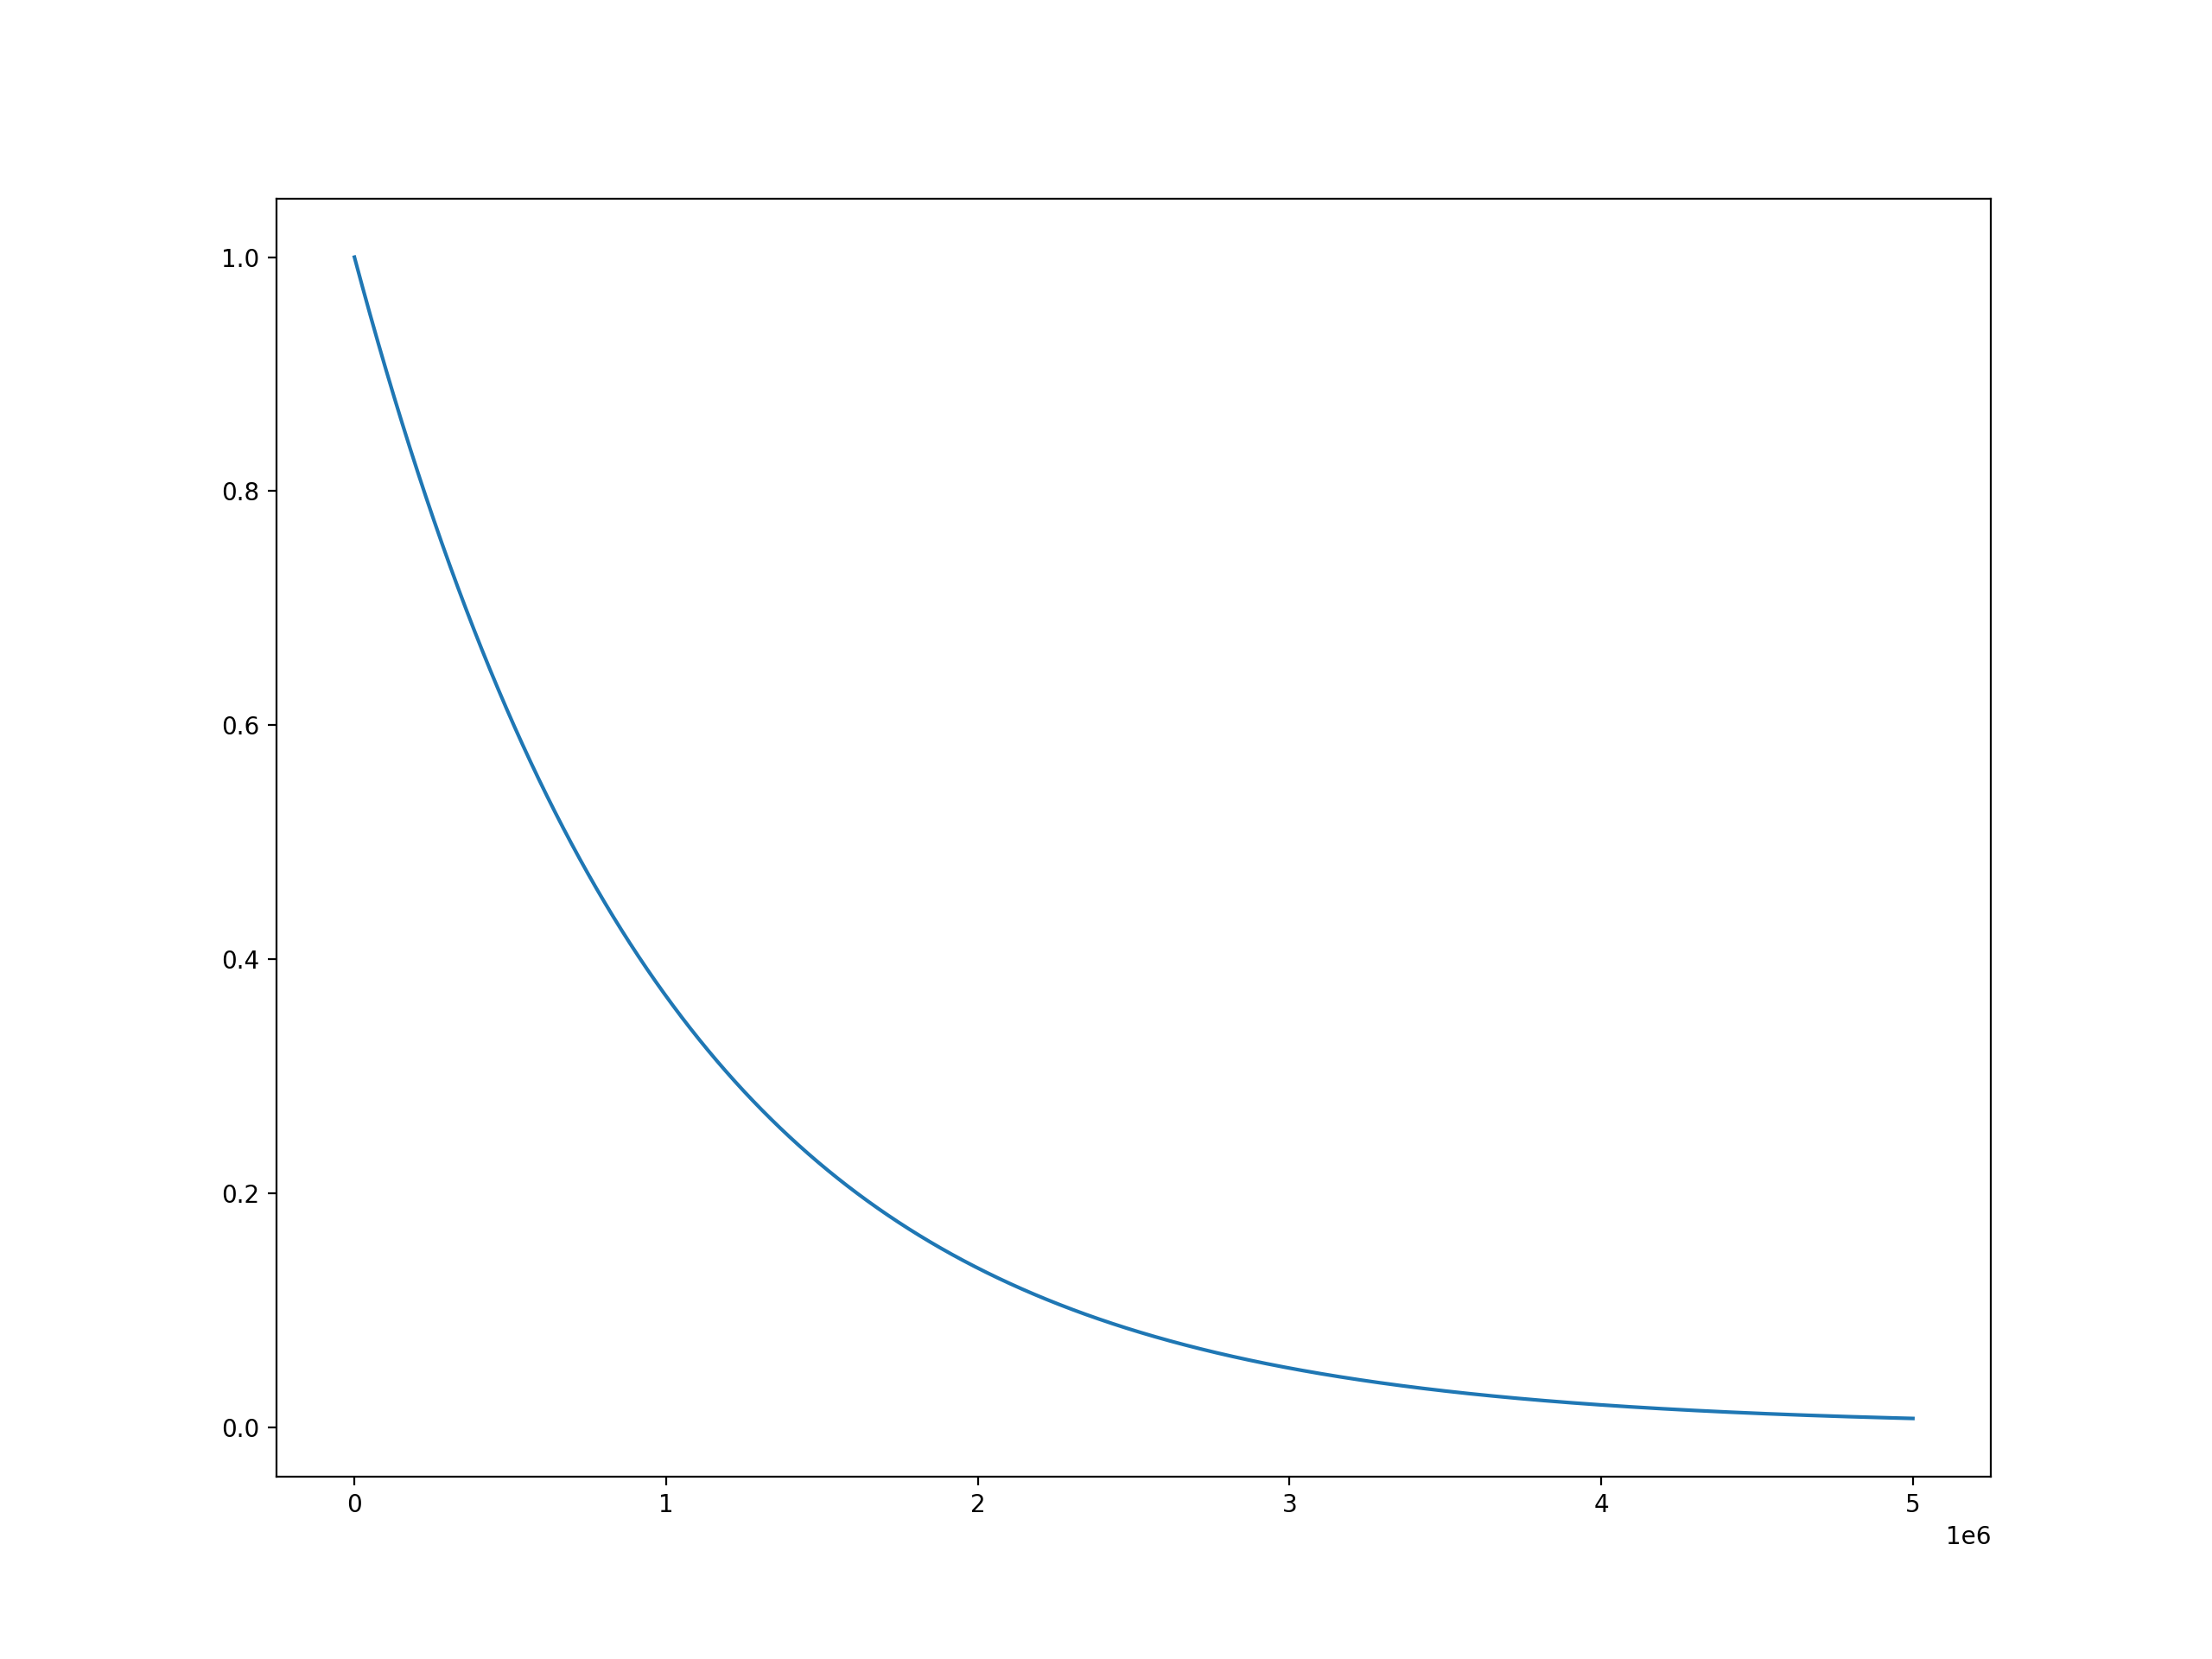

In [26]:
plt.plot(time, epsilon)
plt.show()